# NSL Notebook 10

## Exercise 10.1.1

In [2]:
######                        #######
##  IMPORT DEFAULT PKGS and VARS   ##
######                        #######

from default import *

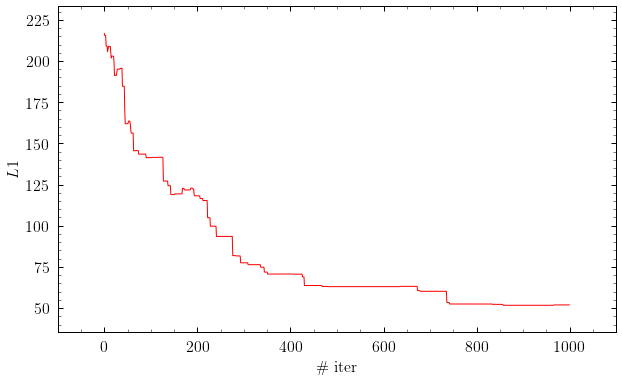

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

dfb = pd.read_csv('bL1OC.out', header=None, names=['L1'])

dfb['L1'].plot.line(ls='-', c='r', ax=ax);

ax.set_ylabel('$L1$');
ax.set_xlabel('\# iter');

In [12]:
from matplotlib.animation import FuncAnimation
from time import sleep

fig, (axb, axa) = plt.subplots(1,2, figsize=(10,5));

dfb = pd.read_csv('circle.tsv', header=None, sep='\t', names=['x','y']);
dfa = pd.read_csv('OC.csv', header=None, sep=',', names=['x','y']);

xb = [dfb['x'][0]]
yb = [dfb['y'][0]]
xa = [dfa['x'][0]]
ya = [dfa['y'][0]]

def func(npt, *fargs):
    xb.append(npt[0][0])
    yb.append(npt[0][1])
    xa.append(npt[1][0])
    ya.append(npt[1][1])
    axb.plot(xb,yb, '-r');
    axa.plot(xa,ya, '-b');
    xb.pop(0)
    yb.pop(0)
    xa.pop(0)
    ya.pop(0)
    
def init_func():
    axb.scatter(dfb['x'], dfb['y'], marker='.', color='k');
    axa.scatter(dfa['x'], dfa['y'], marker='.', color='k');
    sleep(1);
    
    
frames = []
for ptb, pta in zip(np.asarray(dfb), np.asarray(dfa)):
    frames.append((ptb, pta))
    
anim = FuncAnimation(fig, func, frames, init_func, interval=300);
plt.close(fig=fig)

from IPython.display import HTML
HTML(anim.to_html5_video())

## Exercise 10.1.2

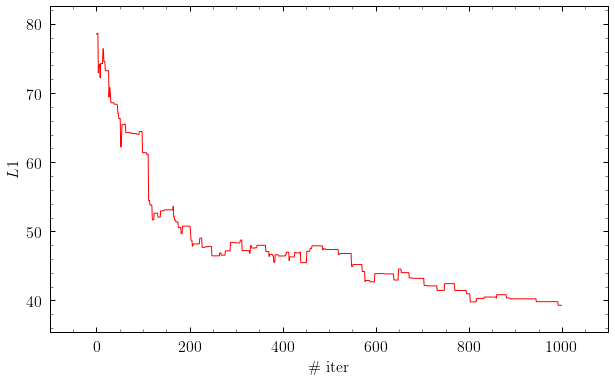

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

dfb = pd.read_csv('bL1IS.out', header=None, names=['L1'])

dfb['L1'].plot.line(ls='-', c='r', ax=ax);

ax.set_ylabel('$L1$');
ax.set_xlabel('\# iter');

In [11]:
from matplotlib.animation import FuncAnimation
from time import sleep

fig, (axb, axa) = plt.subplots(1,2, figsize=(10,5));

dfb = pd.read_csv('square.tsv', header=None, sep='\t', names=['x','y']);
dfa = pd.read_csv('IS.csv', header=None, sep=',', names=['x','y']);

xb = [dfb['x'][0]]
yb = [dfb['y'][0]]

xa = [dfa['x'][0]]
ya = [dfa['y'][0]]

def func(npt, *fargs):
    xb.append(npt[0][0])
    yb.append(npt[0][1])
    xa.append(npt[1][0])
    ya.append(npt[1][1])
    axb.plot(xb,yb, '-r');
    axa.plot(xa,ya, '-b');
    xb.pop(0)
    yb.pop(0)
    xa.pop(0)
    ya.pop(0)
    
def init_func():
    axb.scatter(dfb['x'], dfb['y'], marker='.', color='k');
    axa.scatter(dfa['x'], dfa['y'], marker='.', color='k');
    sleep(1);
    
    
frames = []
for ptb, pta in zip(np.asarray(dfb), np.asarray(dfa)):
    frames.append((ptb, pta))
    
anim = FuncAnimation(fig, func, frames, init_func, interval=300, blit=False);
plt.close(fig=fig)

from IPython.display import HTML
HTML(anim.to_html5_video())

## Excercise 10.2

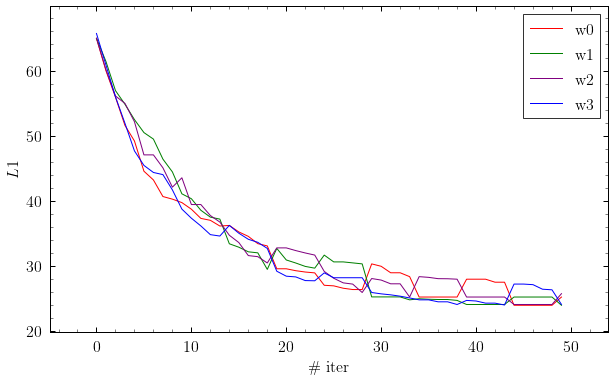

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

cc = ['r', 'green', 'purple', 'b']

df = dict()
for i in range(4):
    df[i] = pd.read_csv(f'bL1IS-mpi-{i}.out', header=None, names=['L1'])
    
for i in range(4):
  df[i]['L1'].plot.line(ls='-', c=cc[i], label=f'w{i}', ax=ax);
    
ax.set_ylabel('$L1$');
ax.set_xlabel('\# iter');
ax.legend();

In [32]:
from matplotlib.animation import FuncAnimation
from time import sleep

fig, ax = plt.subplots(2,2, figsize=(10,10));

cc = ['r', 'green', 'purple', 'b']

ax = np.asarray(ax)
ax = ax.reshape(1,4)[0]

df = dict()
xx = dict()
yy = dict()
for i in range(4):
    df[i] = pd.read_csv(f'IS-mpi-{i}.csv', header=None, names=['x','y']);
    xx[i] = [df[i]['x'][0]]
    yy[i] = [df[i]['y'][0]]


def func(npt, *fargs):
    for i in range(4):
        xx[i].append(npt[i][0])
        yy[i].append(npt[i][1])
        ax[i].plot(xx[i],yy[i], ls='-', c=cc[i]);
        xx[i].pop(0)
        yy[i].pop(0)

def init_func():
    for i in range(4):
        ax[i].scatter(df[i]['x'], df[i]['y'], marker='.', color='k');
    sleep(1);
        
frames = []
for pt0, pt1, pt2, pt3 in zip(np.asarray(df[0]), np.asarray(df[1]), np.asarray(df[2]), np.asarray(df[3])):
    frames.append((pt0, pt1, pt2, pt3))
    
anim = FuncAnimation(fig, func, frames, init_func, interval=300, blit=False);
plt.close(fig=fig)

from IPython.display import HTML
HTML(anim.to_html5_video())